In [6]:
import pandas as pd
import numpy as np

import plotly
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import matplotlib.pyplot as plt


In [10]:
df= pd.read_csv('diffs_pgstats_db.txt',sep= '\t')
df.head()

,file,nsamp,ndiffs,ncells,piT,piW,TajD
0,./crashC1.161174204/crashC1.161174204_chr1.vcf.gz,2,8252,133052,4073.833333,4467.818182,-0.041314
1,./crashC1.161174204/crashC1.161174204_chr1.vcf.gz,3,11886,199578,3959.533333,4191.240876,-0.018294
2,./crashC1.161174204/crashC1.161174204_chr1.vcf.gz,4,15808,266104,3964.821429,4132.506887,-0.010360
3,./crashC1.161174204/crashC1.161174204_chr1.vcf.gz,5,18592,332630,3909.555556,4044.584093,-0.006931
4,./crashC1.161174204/crashC1.161174204_chr1.vcf.gz,6,23634,399156,3975.378788,4071.026269,-0.004106


150053.63645888833
equil: 9, M: 113639 +-935
201431.85174038378
growth: 10, M: 188084 +-1301
102327.41765484792
crash: 11, M: 66654 +-530


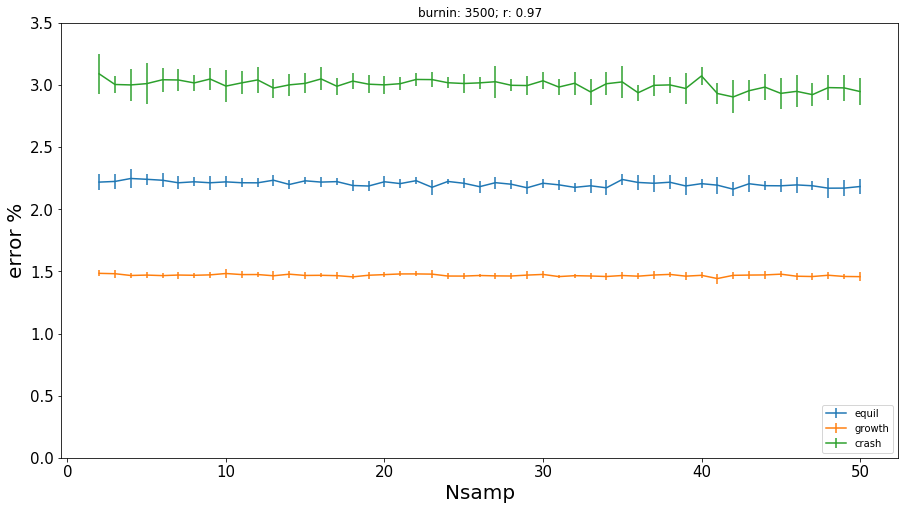

In [11]:
burnin= 3500

rate= 0.97

factor= list(df.file)
factor= [x.strip('./').split('C')[0] for x in factor]

figname= 'samp_error.pdf'
width= 15
height= 8
plt.figure(figsize=(width, height))


for fact in list(set(factor)):
    quick_parse= [x for x in range(len(factor)) if factor[x] == fact]
    
    test_df= df.iloc[quick_parse,:]
    
    ndiffs= np.array(test_df.ndiffs,dtype= int)
    nsamp= np.array(test_df.nsamp,dtype= int)
    nsnps= np.array(test_df.ncells,dtype= int) 
    
    tajD= np.array(test_df.TajD,dtype= float)
    piW= np.array(test_df.piW,dtype= float)
    piW= piW / 1e6
    
    conv_pi= piW / 4 / 1e-8
    print(np.mean(conv_pi))
    
    nsnps= nsnps / nsamp
    nsnps
    print('{}: {}, M: {} +-{}'.format(fact,len(list(set(test_df.file))),np.mean(np.unique(nsnps),dtype=int),np.std(np.unique(nsnps),dtype=int)))
    diffsp= ndiffs / 2 / nsamp / nsnps
    
    diff_dict= {
        z:[diffsp[x] for x in range(test_df.shape[0]) if nsamp[x] == z] for z in list(set(nsamp))
    }
    
    X= sorted(diff_dict.keys())
    Y= [np.mean(diff_dict[z])*100 for z in X]
    error= [np.std(diff_dict[z])*100 for z in X]
    

    plt.errorbar(X,Y,yerr= error,label= fact)


plt.legend(loc= 'lower right')
plt.ylabel('error %',fontsize= 20)
plt.xlabel('Nsamp',fontsize= 20)
plt.ylim(0,3.5)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('burnin: {}; r: {}'.format(burnin, rate))

plt.savefig(figname)
plt.show()
plt.close()


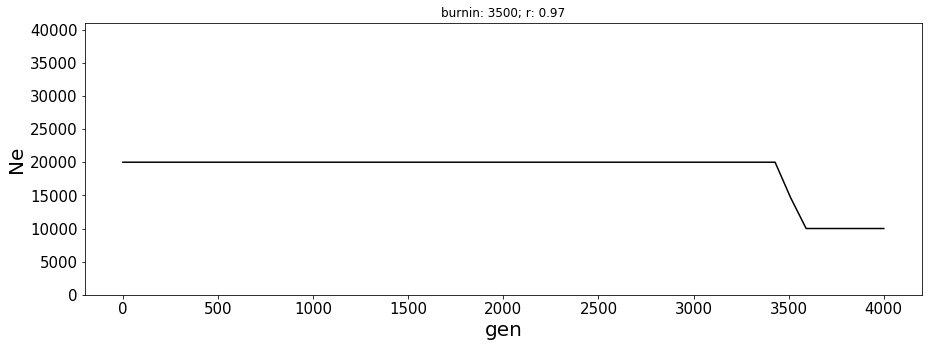

In [34]:
import os

def equil(x,tc= 3500,N0= 2000,N1= 2000,rate= 1.5):
    
    return N0

def size_change(x,tc= 3500,N0= 2000,N1= 2000,rate= 1.5):
    
    ns= np.array(x)
    xbellow= ns <= tc
    
    xt= x - tc
    ns= rate**(xt) * N0
    
    ns[xbellow]= N0
    
    if rate < 1:
        ns[ns <= N1]= N1
    
    if rate > 1:
        ns[ns >= N1]= N1
    
    return ns


####### ### #######
################

rate= 0.97
burnin= 3500

X= np.linspace(0,4000)

Ne= size_change(X,tc= burnin,
                N0= 20000,
                N1= 10000,
                rate=rate)


width= 15
height= 5

figname= 'example_crash.pdf'

plt.figure(figsize=(width, height))

plt.plot(X,Ne,color= 'black')

plt.xlabel('gen',fontsize= 20)
plt.ylabel('Ne',fontsize= 20)
plt.ylim(0,41000)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('burnin: {}; r: {}'.format(burnin, rate))

plt.savefig(figname)
plt.show()
plt.close()
